In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [7]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Shimla.csv')

In [8]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR'],
      dtype='object')

In [9]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,14.57
1,2004010114,17.56
2,2004010406,4.09
3,2004010408,8.66
4,2004010410,14.27


In [10]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,14.57
1,2004-01-01 14:00:00,17.56
2,2004-01-04 06:00:00,4.09
3,2004-01-04 08:00:00,8.66
4,2004-01-04 10:00:00,14.27


In [11]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,14.57
2004-01-01 14:00:00,2004-01-01 14:00:00,17.56
2004-01-04 06:00:00,2004-01-04 06:00:00,4.09
2004-01-04 08:00:00,2004-01-04 08:00:00,8.66
2004-01-04 10:00:00,2004-01-04 10:00:00,14.27


In [12]:
data=data.sort_index()

In [13]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,6.63
2004-01-01 06:00:00,2004-01-01 06:00:00,7.09
2004-01-01 07:00:00,2004-01-01 07:00:00,8.27
2004-01-01 08:00:00,2004-01-01 08:00:00,11.80
2004-01-01 09:00:00,2004-01-01 09:00:00,14.57


In [14]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [15]:
#checking for duplicated entried
data.duplicated().sum()

120

In [16]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [17]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,14.09
2024-02-19 01:00:00,2024-02-19 01:00:00,13.76
2024-02-19 02:00:00,2024-02-19 02:00:00,13.80
2024-02-19 03:00:00,2024-02-19 03:00:00,13.85
2024-02-19 04:00:00,2024-02-19 04:00:00,13.92


In [18]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,13.48
2024-02-18 20:00:00,2024-02-18 20:00:00,13.91
2024-02-18 21:00:00,2024-02-18 21:00:00,13.82
2024-02-18 22:00:00,2024-02-18 22:00:00,13.82
2024-02-18 23:00:00,2024-02-18 23:00:00,14.02


In [19]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [20]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

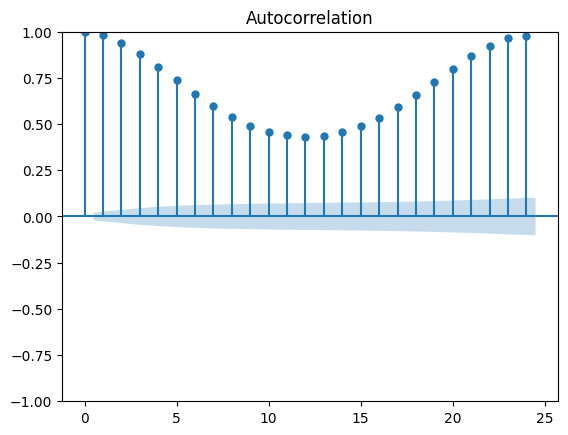

In [21]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

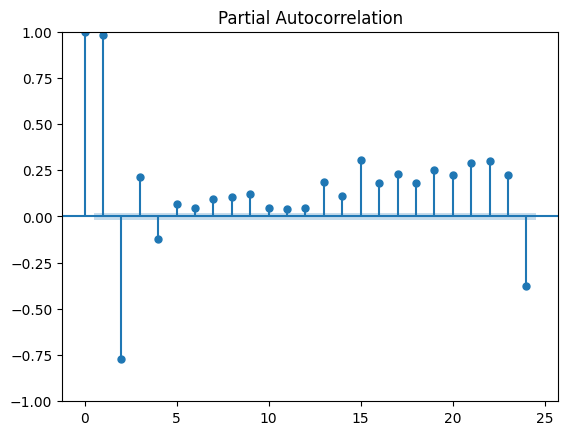

In [22]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [23]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [24]:
#to store RMSE after every year
rmse_record={}

In [25]:
# Fit SARIMA model
shimla_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
shimla_result = shimla_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10285D-01    |proj g|=  5.10455D-01


 This problem is unconstrained.



At iterate    5    f=  3.69388D-01    |proj g|=  4.92910D-01

At iterate   10    f=  3.49607D-01    |proj g|=  2.69638D-03

At iterate   15    f=  3.49606D-01    |proj g|=  4.41445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     27      1     0     0   5.660D-07   3.496D-01
  F =  0.34960587939646165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [26]:
# Forecast temperatures for the next 48 hours
forecast = shimla_result.get_forecast(steps=48)

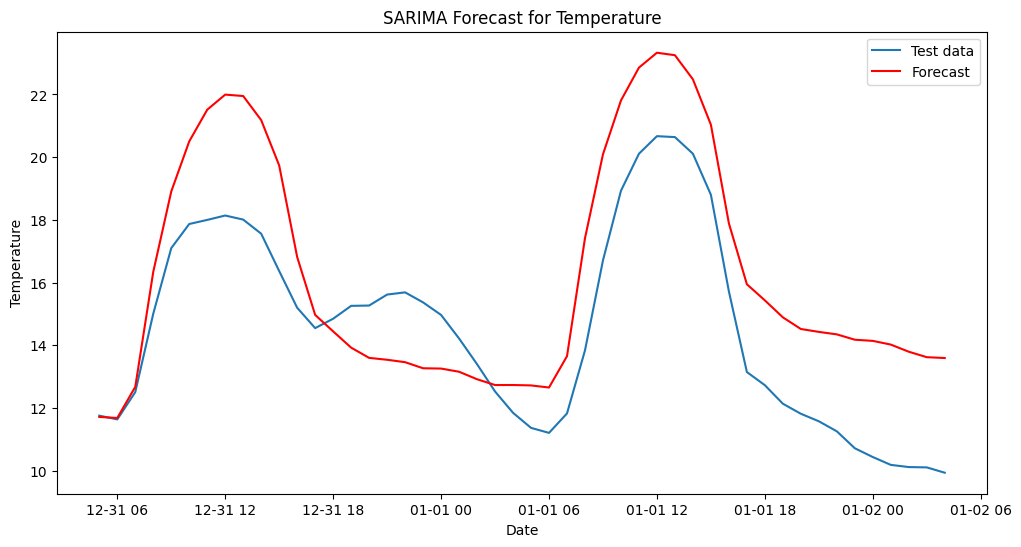

In [27]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [28]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.538685926508649


In [29]:
rmse_record[1]=rmse

In [30]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


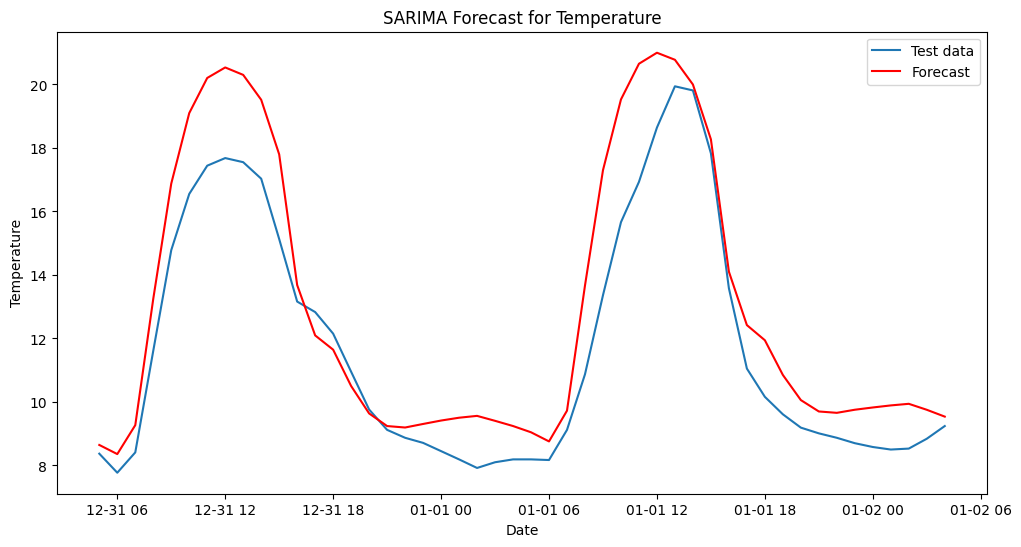

Root Mean Squared Error (RMSE): 1.6924056585632494
training now:  3


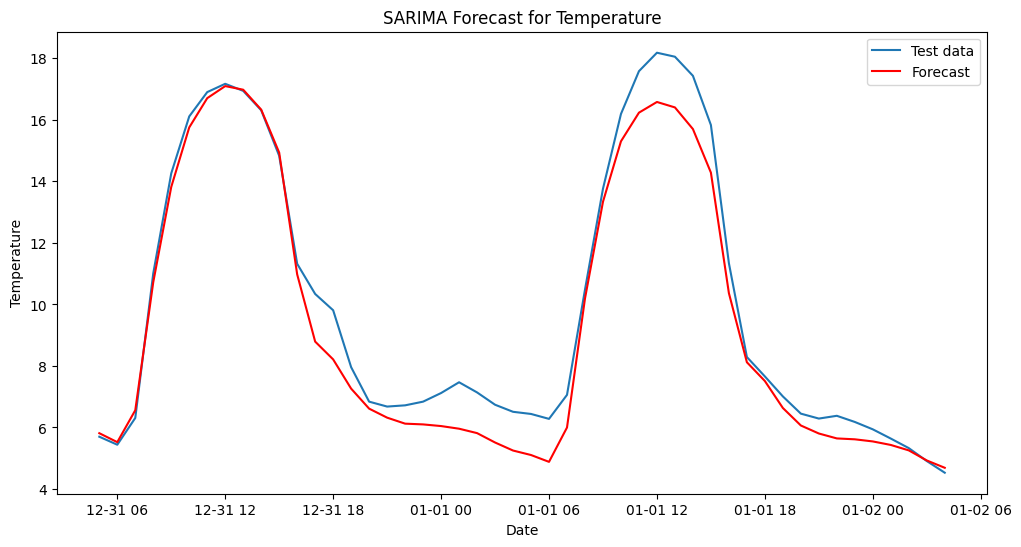

Root Mean Squared Error (RMSE): 0.8715346177489398
training now:  4


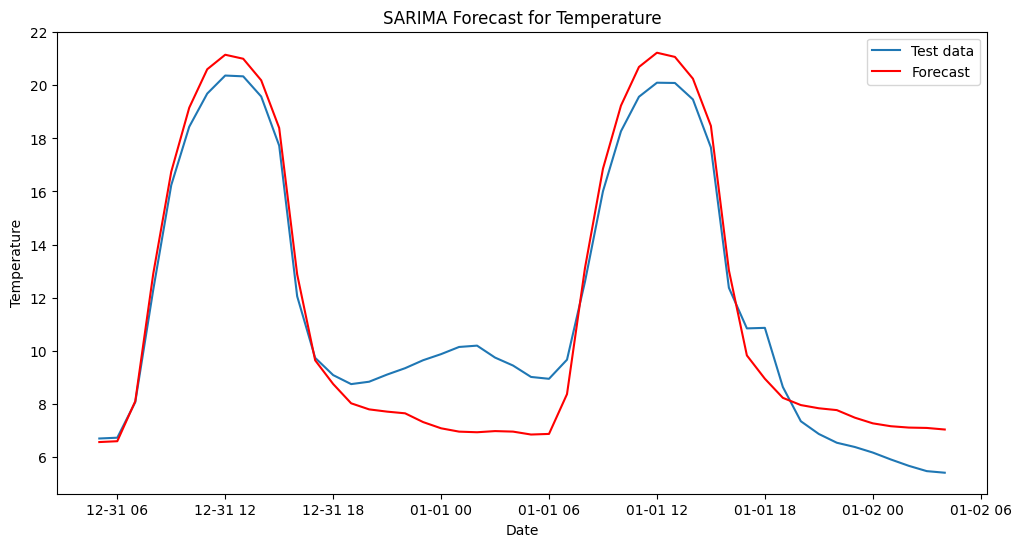

Root Mean Squared Error (RMSE): 1.4144953437151258
training now:  5


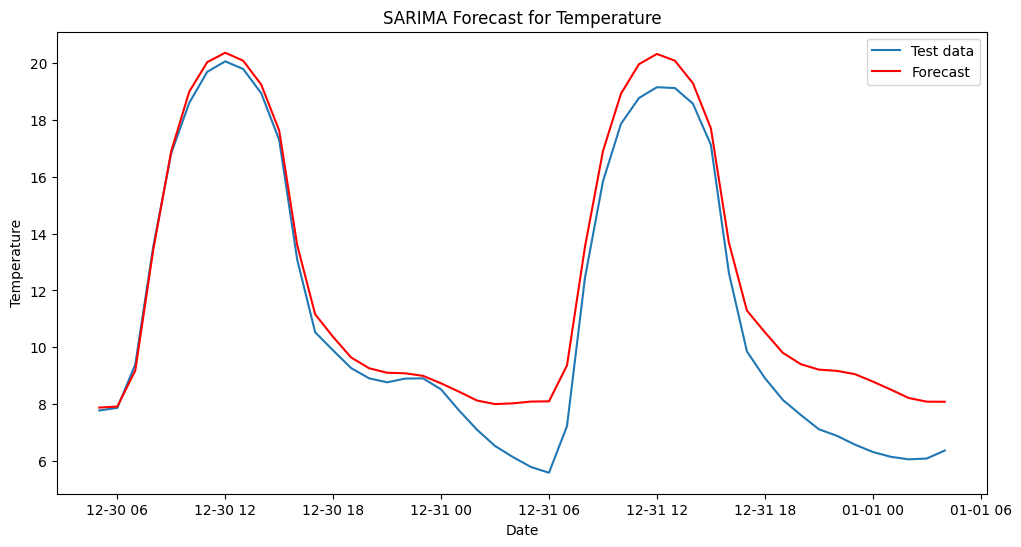

Root Mean Squared Error (RMSE): 1.3252032514161836
training now:  6


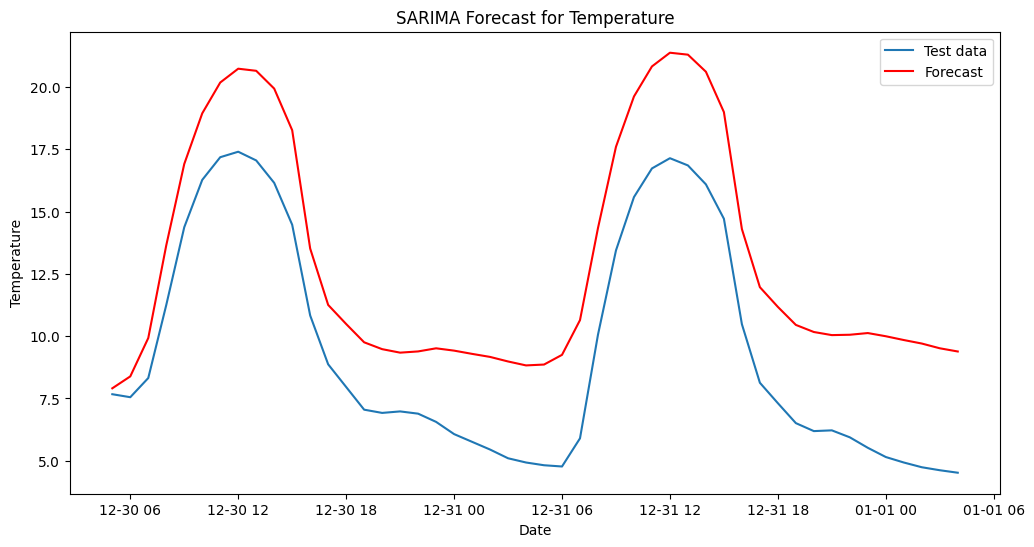

Root Mean Squared Error (RMSE): 3.702105386502305
training now:  7


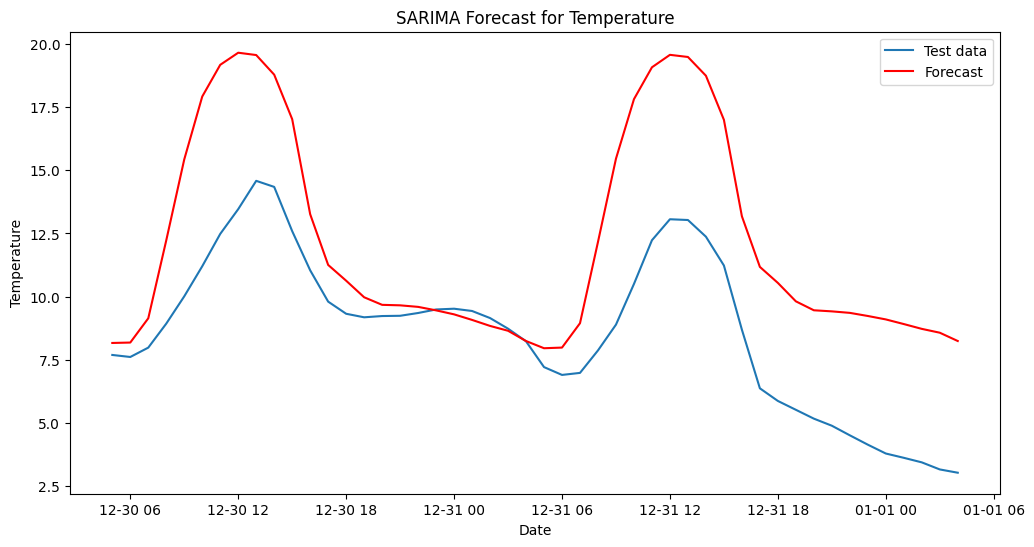

Root Mean Squared Error (RMSE): 4.2864704027601634
training now:  8


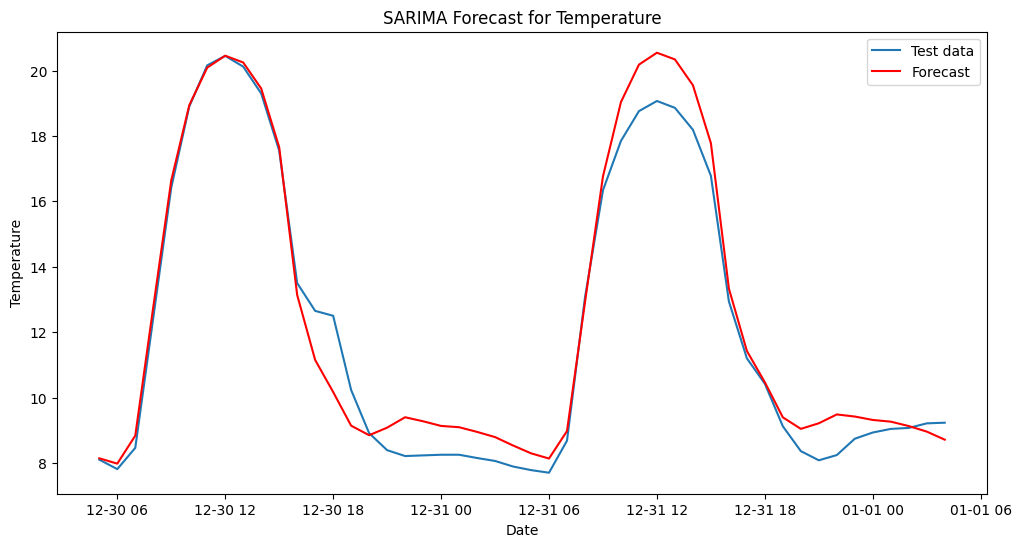

Root Mean Squared Error (RMSE): 0.8088466141570326
training now:  9


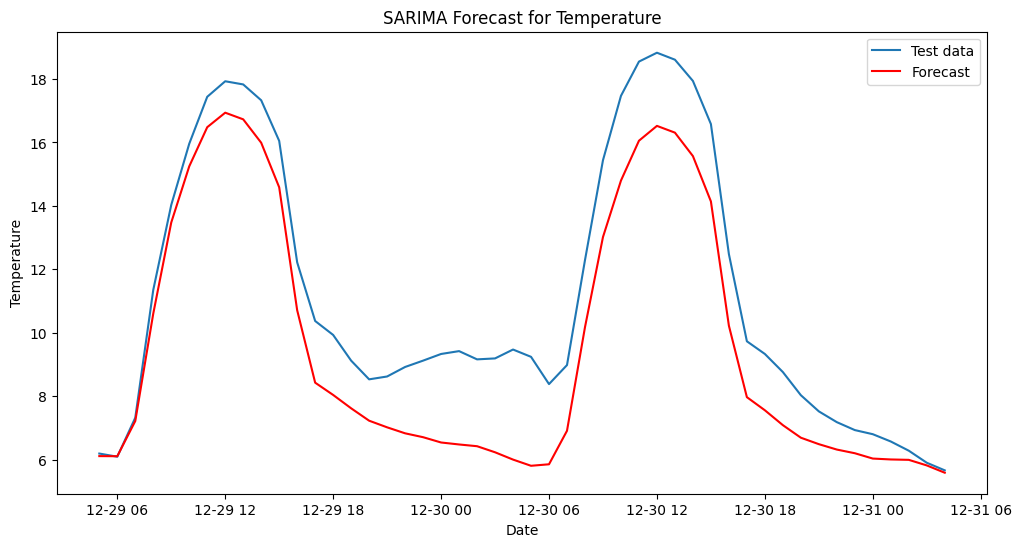

Root Mean Squared Error (RMSE): 1.8667729406887195
training now:  10


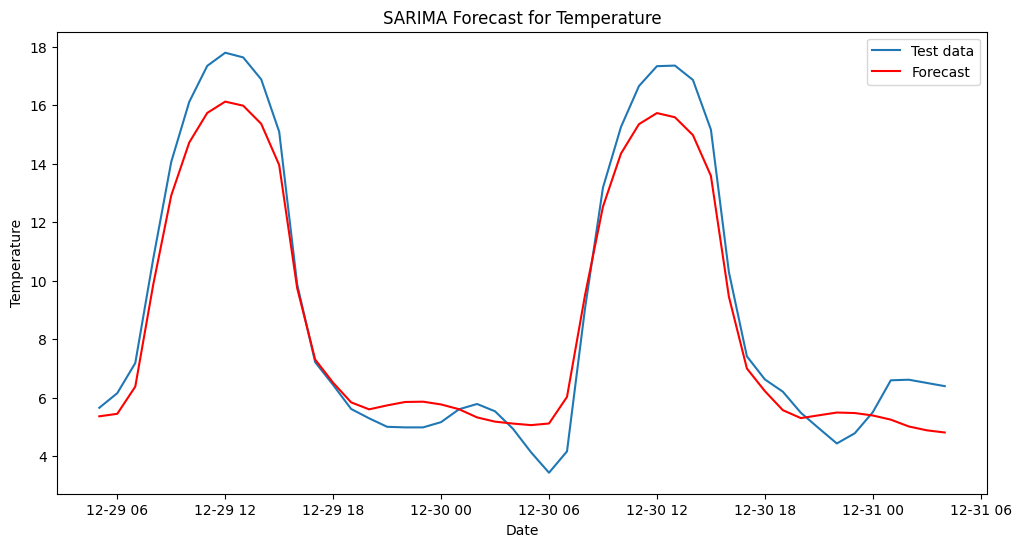

Root Mean Squared Error (RMSE): 1.0683858636177384
training now:  11


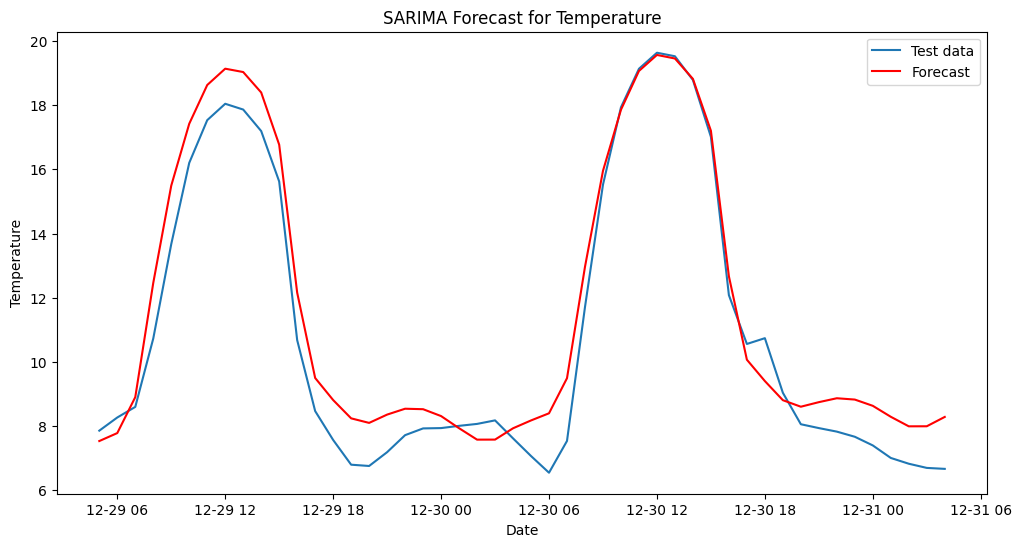

Root Mean Squared Error (RMSE): 1.036452732925229
training now:  12


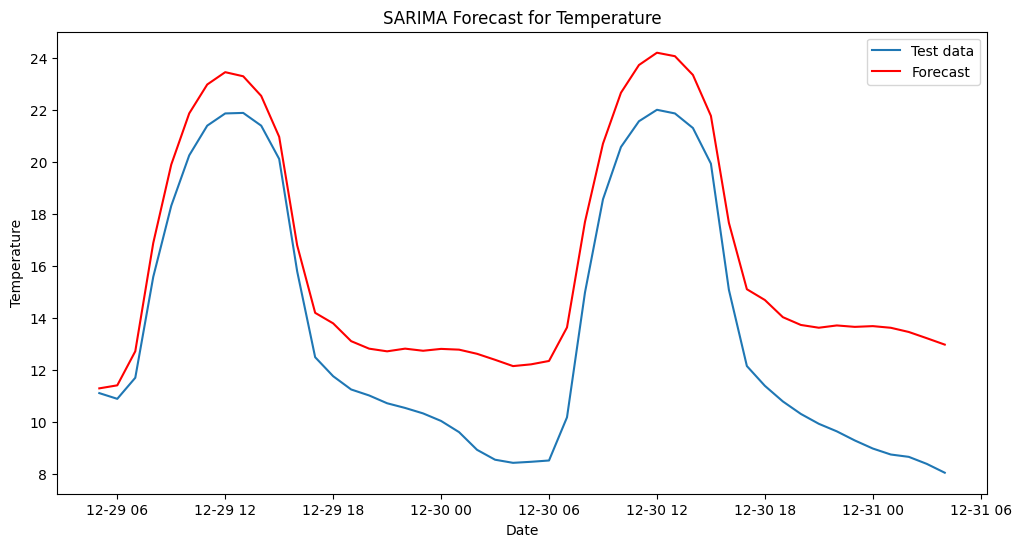

Root Mean Squared Error (RMSE): 2.8857897699885866
training now:  13


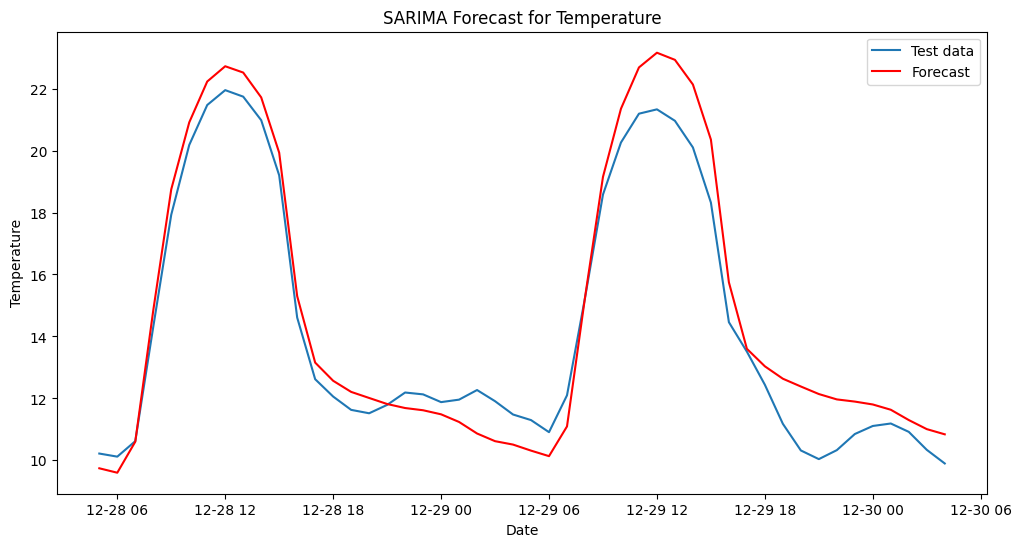

Root Mean Squared Error (RMSE): 1.0482499937236254
training now:  14


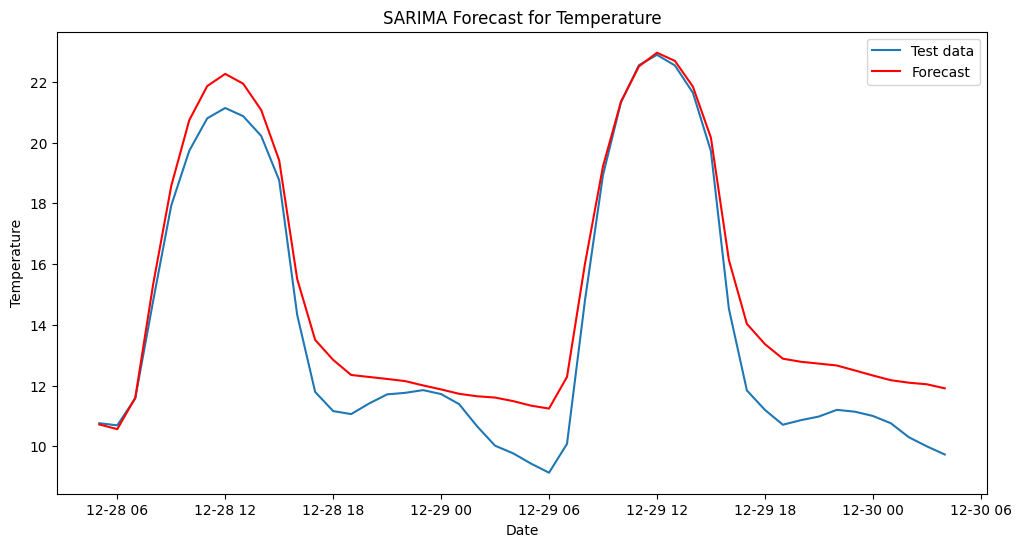

Root Mean Squared Error (RMSE): 1.3009246225006703
training now:  15


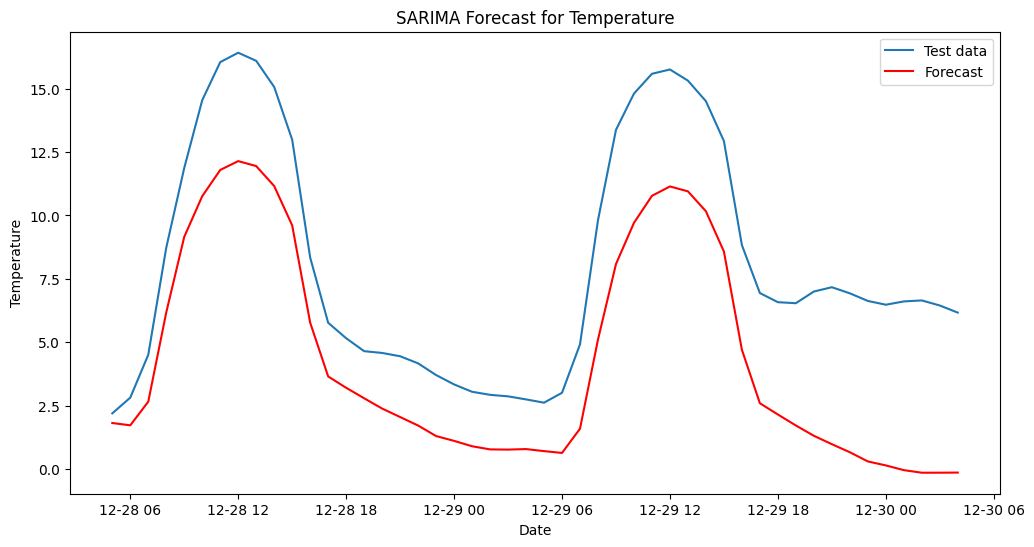

Root Mean Squared Error (RMSE): 4.12178171027356
training now:  16


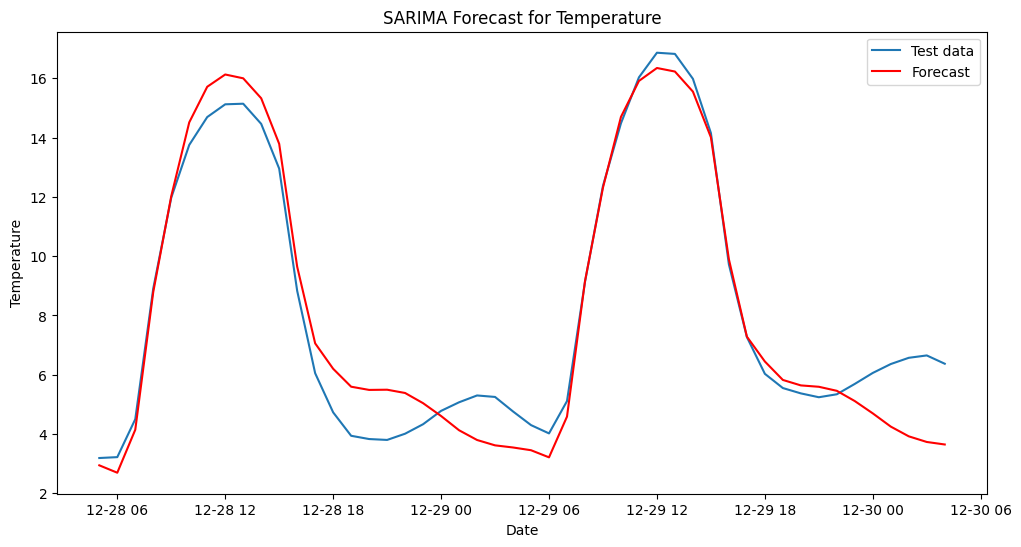

Root Mean Squared Error (RMSE): 1.1164032199299168
training now:  17


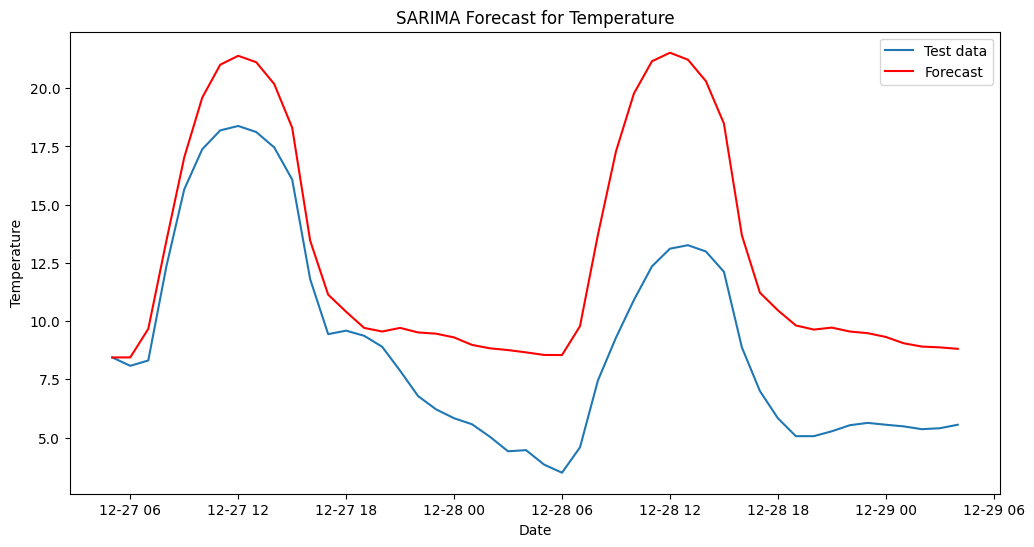

Root Mean Squared Error (RMSE): 4.407860557907766
training now:  18


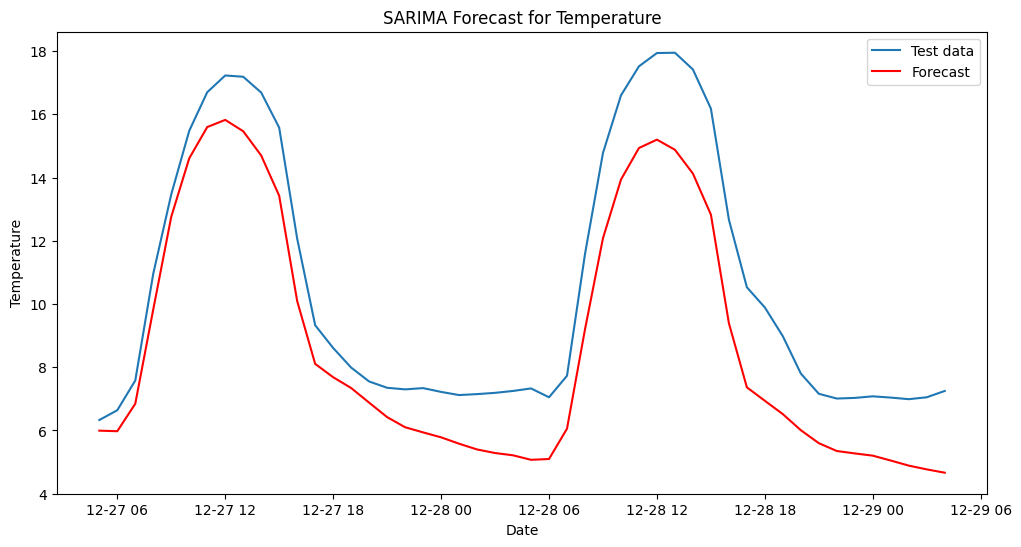

Root Mean Squared Error (RMSE): 2.00699978768001
training now:  19


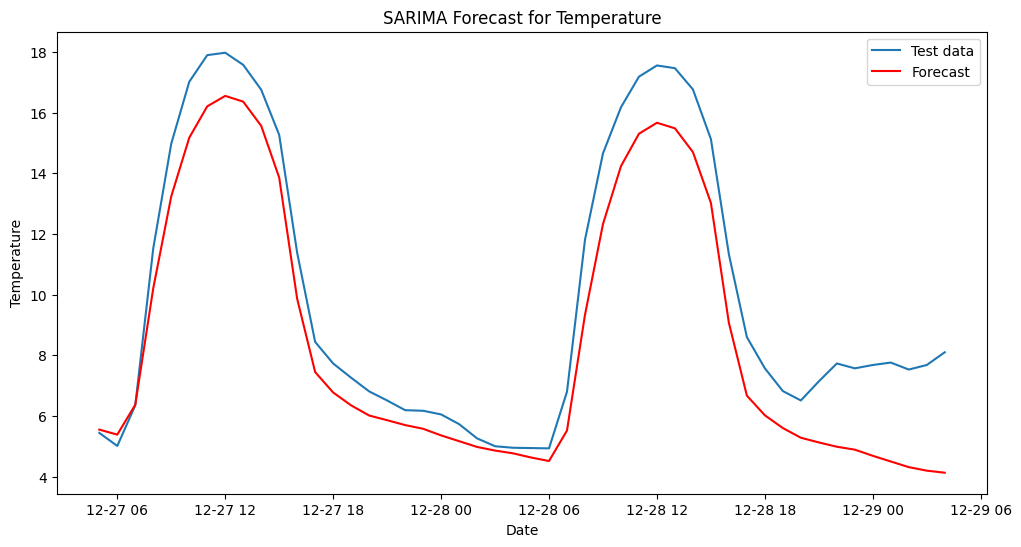

Root Mean Squared Error (RMSE): 1.7890632618223687
training now:  20


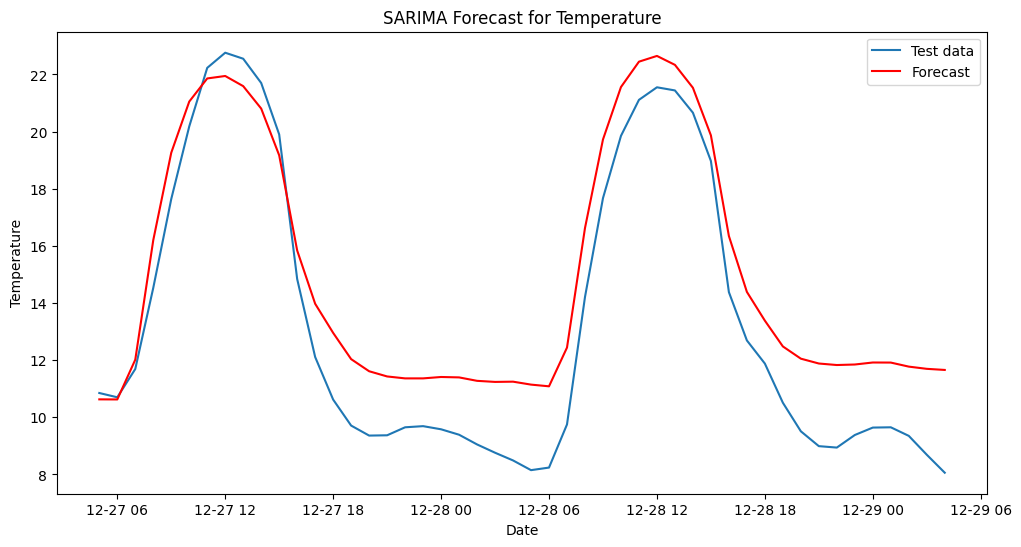

Root Mean Squared Error (RMSE): 1.9830316692721761


In [31]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    shimla_result=shimla_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = shimla_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [32]:
rmse_record

{1: 2.538685926508649,
 2: 1.6924056585632494,
 3: 0.8715346177489398,
 4: 1.4144953437151258,
 5: 1.3252032514161836,
 6: 3.702105386502305,
 7: 4.2864704027601634,
 8: 0.8088466141570326,
 9: 1.8667729406887195,
 10: 1.0683858636177384,
 11: 1.036452732925229,
 12: 2.8857897699885866,
 13: 1.0482499937236254,
 14: 1.3009246225006703,
 15: 4.12178171027356,
 16: 1.1164032199299168,
 17: 4.407860557907766,
 18: 2.00699978768001,
 19: 1.7890632618223687,
 20: 1.9830316692721761}

In [33]:
forecast2.predicted_mean

2023-12-27 05:00:00    10.627557
2023-12-27 06:00:00    10.624499
2023-12-27 07:00:00    12.016273
2023-12-27 08:00:00    16.200022
2023-12-27 09:00:00    19.259888
2023-12-27 10:00:00    21.049761
2023-12-27 11:00:00    21.859683
2023-12-27 12:00:00    21.945703
2023-12-27 13:00:00    21.590409
2023-12-27 14:00:00    20.805208
2023-12-27 15:00:00    19.169593
2023-12-27 16:00:00    15.838915
2023-12-27 17:00:00    13.973610
2023-12-27 18:00:00    12.954325
2023-12-27 19:00:00    12.035660
2023-12-27 20:00:00    11.611629
2023-12-27 21:00:00    11.429625
2023-12-27 22:00:00    11.361822
2023-12-27 23:00:00    11.361857
2023-12-28 00:00:00    11.410554
2023-12-28 01:00:00    11.396219
2023-12-28 02:00:00    11.276184
2023-12-28 03:00:00    11.238248
2023-12-28 04:00:00    11.246976
2023-12-28 05:00:00    11.143830
2023-12-28 06:00:00    11.084249
2023-12-28 07:00:00    12.440433
2023-12-28 08:00:00    16.623904
2023-12-28 09:00:00    19.723462
2023-12-28 10:00:00    21.558615
2023-12-28

In [34]:
train_data=data[175200:]

In [35]:
shimla_result=shimla_result.extend(train_data["TEMP"])
forecast2 = shimla_result.get_forecast(steps=48)


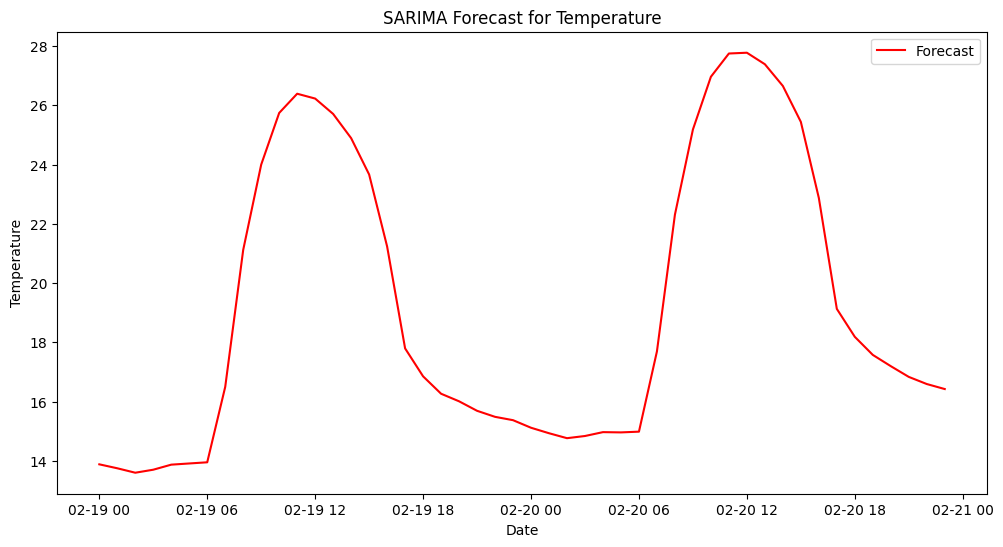

In [36]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [39]:
#saving pickle file of model
with open("/kaggle/working/shimla_model.pkl", 'wb') as f:
    pickle.dump(shimla_result, f)

In [38]:
forecast2.predicted_mean

2024-02-19 00:00:00    13.880441
2024-02-19 01:00:00    13.746919
2024-02-19 02:00:00    13.597009
2024-02-19 03:00:00    13.698838
2024-02-19 04:00:00    13.869422
2024-02-19 05:00:00    13.909502
2024-02-19 06:00:00    13.949037
2024-02-19 07:00:00    16.495617
2024-02-19 08:00:00    21.120842
2024-02-19 09:00:00    24.000193
2024-02-19 10:00:00    25.744835
2024-02-19 11:00:00    26.393622
2024-02-19 12:00:00    26.230309
2024-02-19 13:00:00    25.710861
2024-02-19 14:00:00    24.893609
2024-02-19 15:00:00    23.666687
2024-02-19 16:00:00    21.236295
2024-02-19 17:00:00    17.794784
2024-02-19 18:00:00    16.851206
2024-02-19 19:00:00    16.264113
2024-02-19 20:00:00    16.008330
2024-02-19 21:00:00    15.687883
2024-02-19 22:00:00    15.483873
2024-02-19 23:00:00    15.371148
2024-02-20 00:00:00    15.115493
2024-02-20 01:00:00    14.930455
2024-02-20 02:00:00    14.763165
2024-02-20 03:00:00    14.836895
2024-02-20 04:00:00    14.967457
2024-02-20 05:00:00    14.958544
2024-02-20